In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Dataset: math performance of secondary school students
math = pd.read_csv("data/UCI/student-mat.csv", sep=";")
print(math.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [63]:
# Check for missing values
print(math.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [64]:
print(math.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [65]:
# Summary statistics
print(math.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

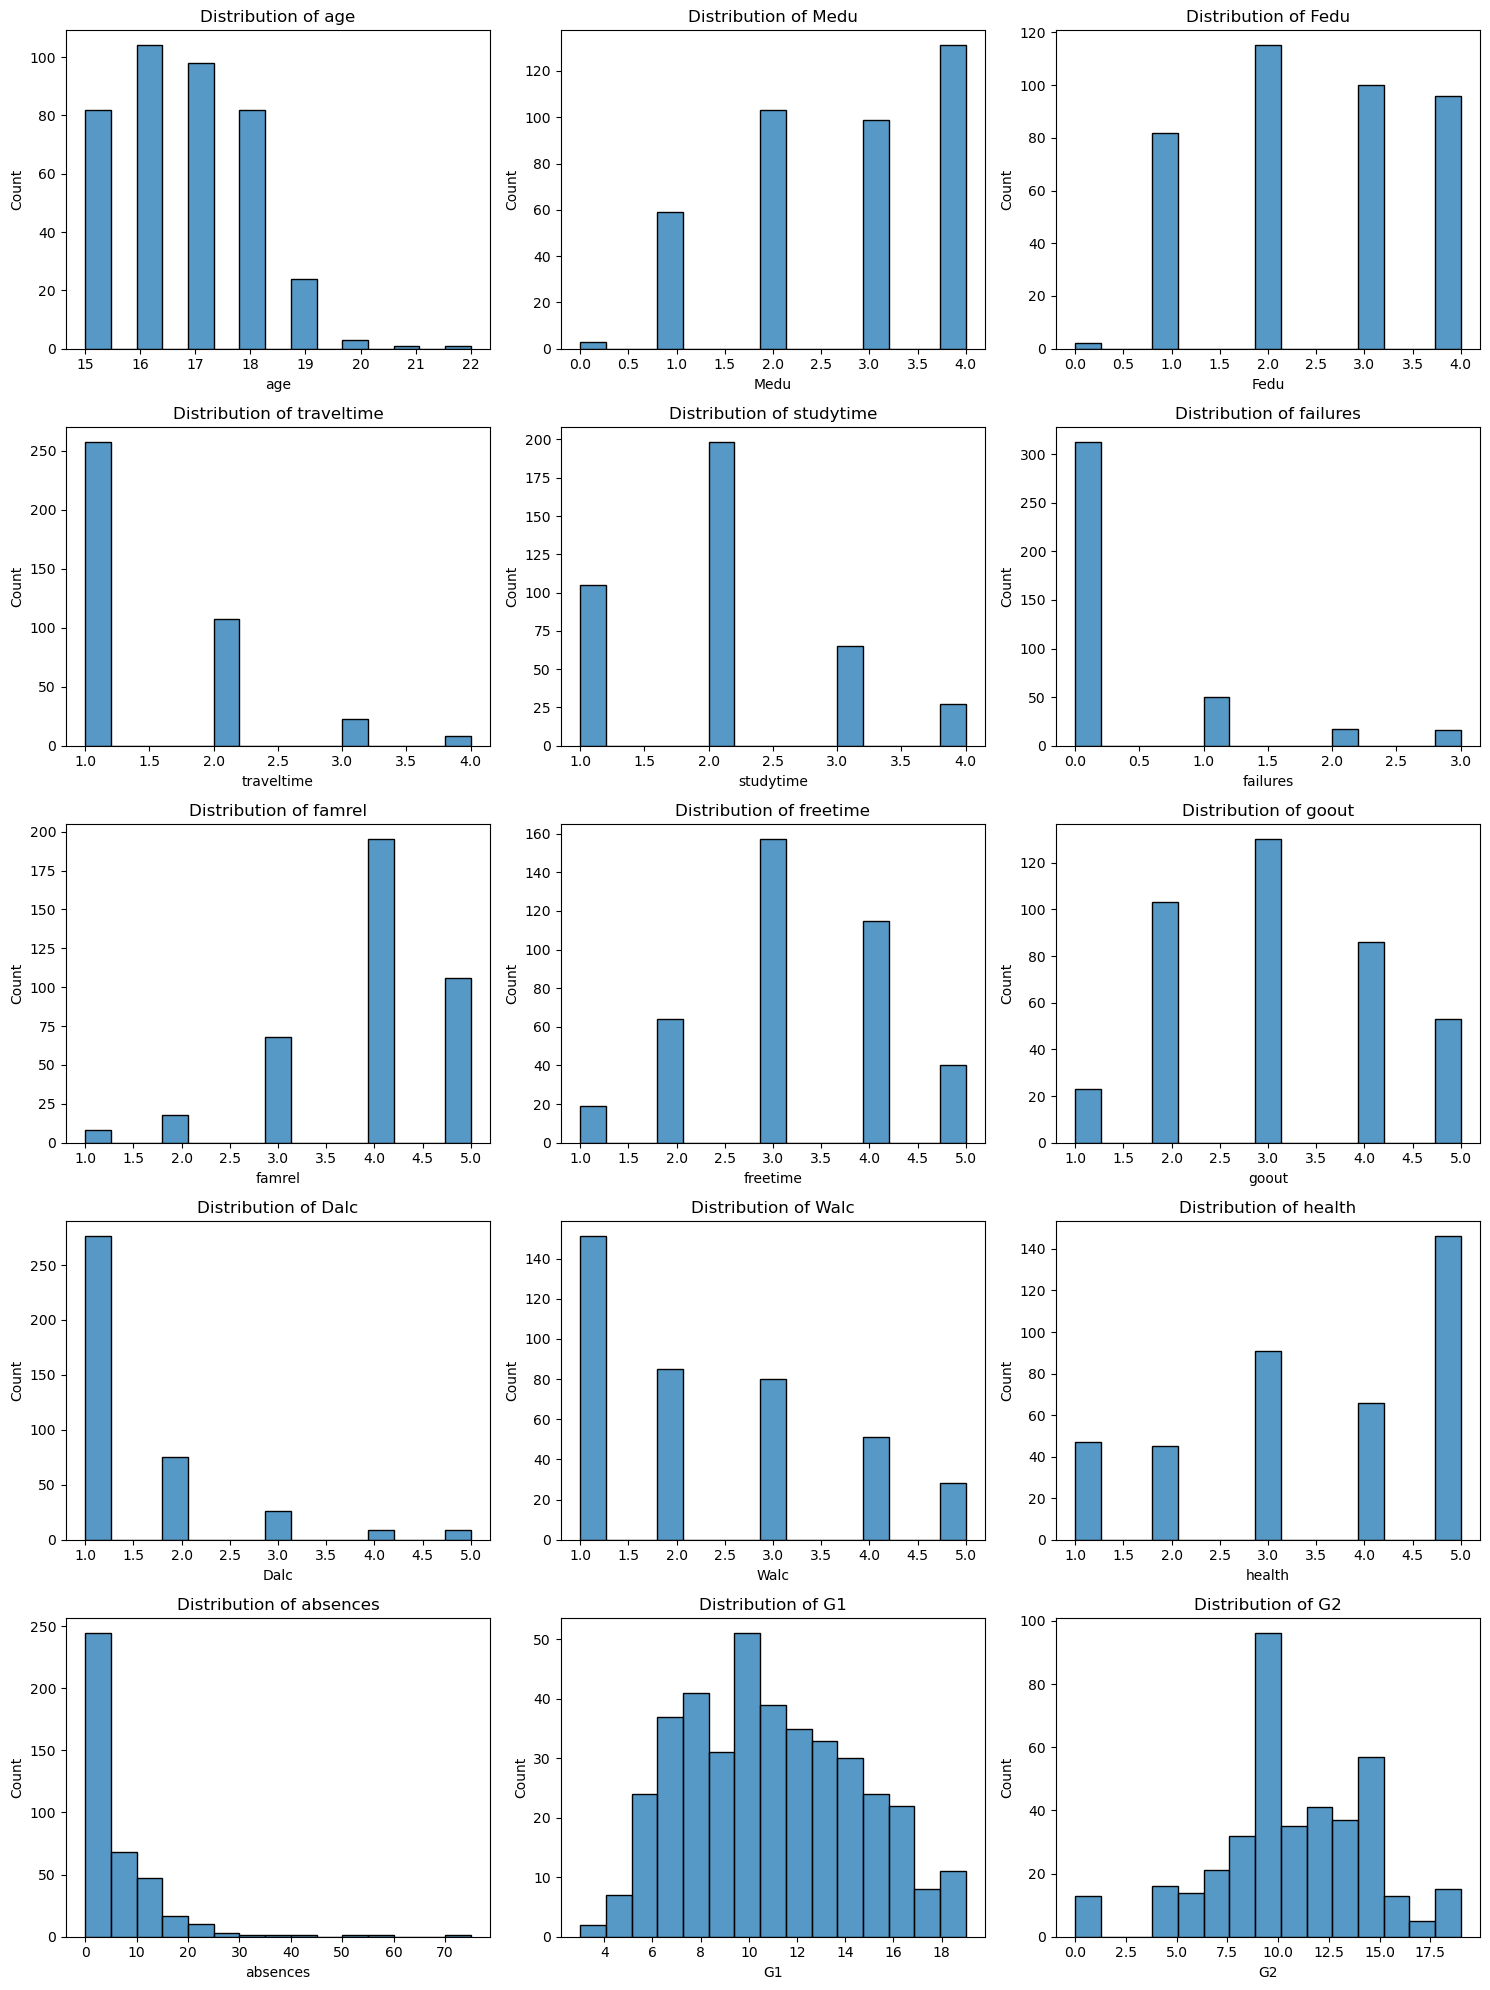

In [66]:
# Distribution of numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                      'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
                      'G1', 'G2']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(math[feature], bins=15, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

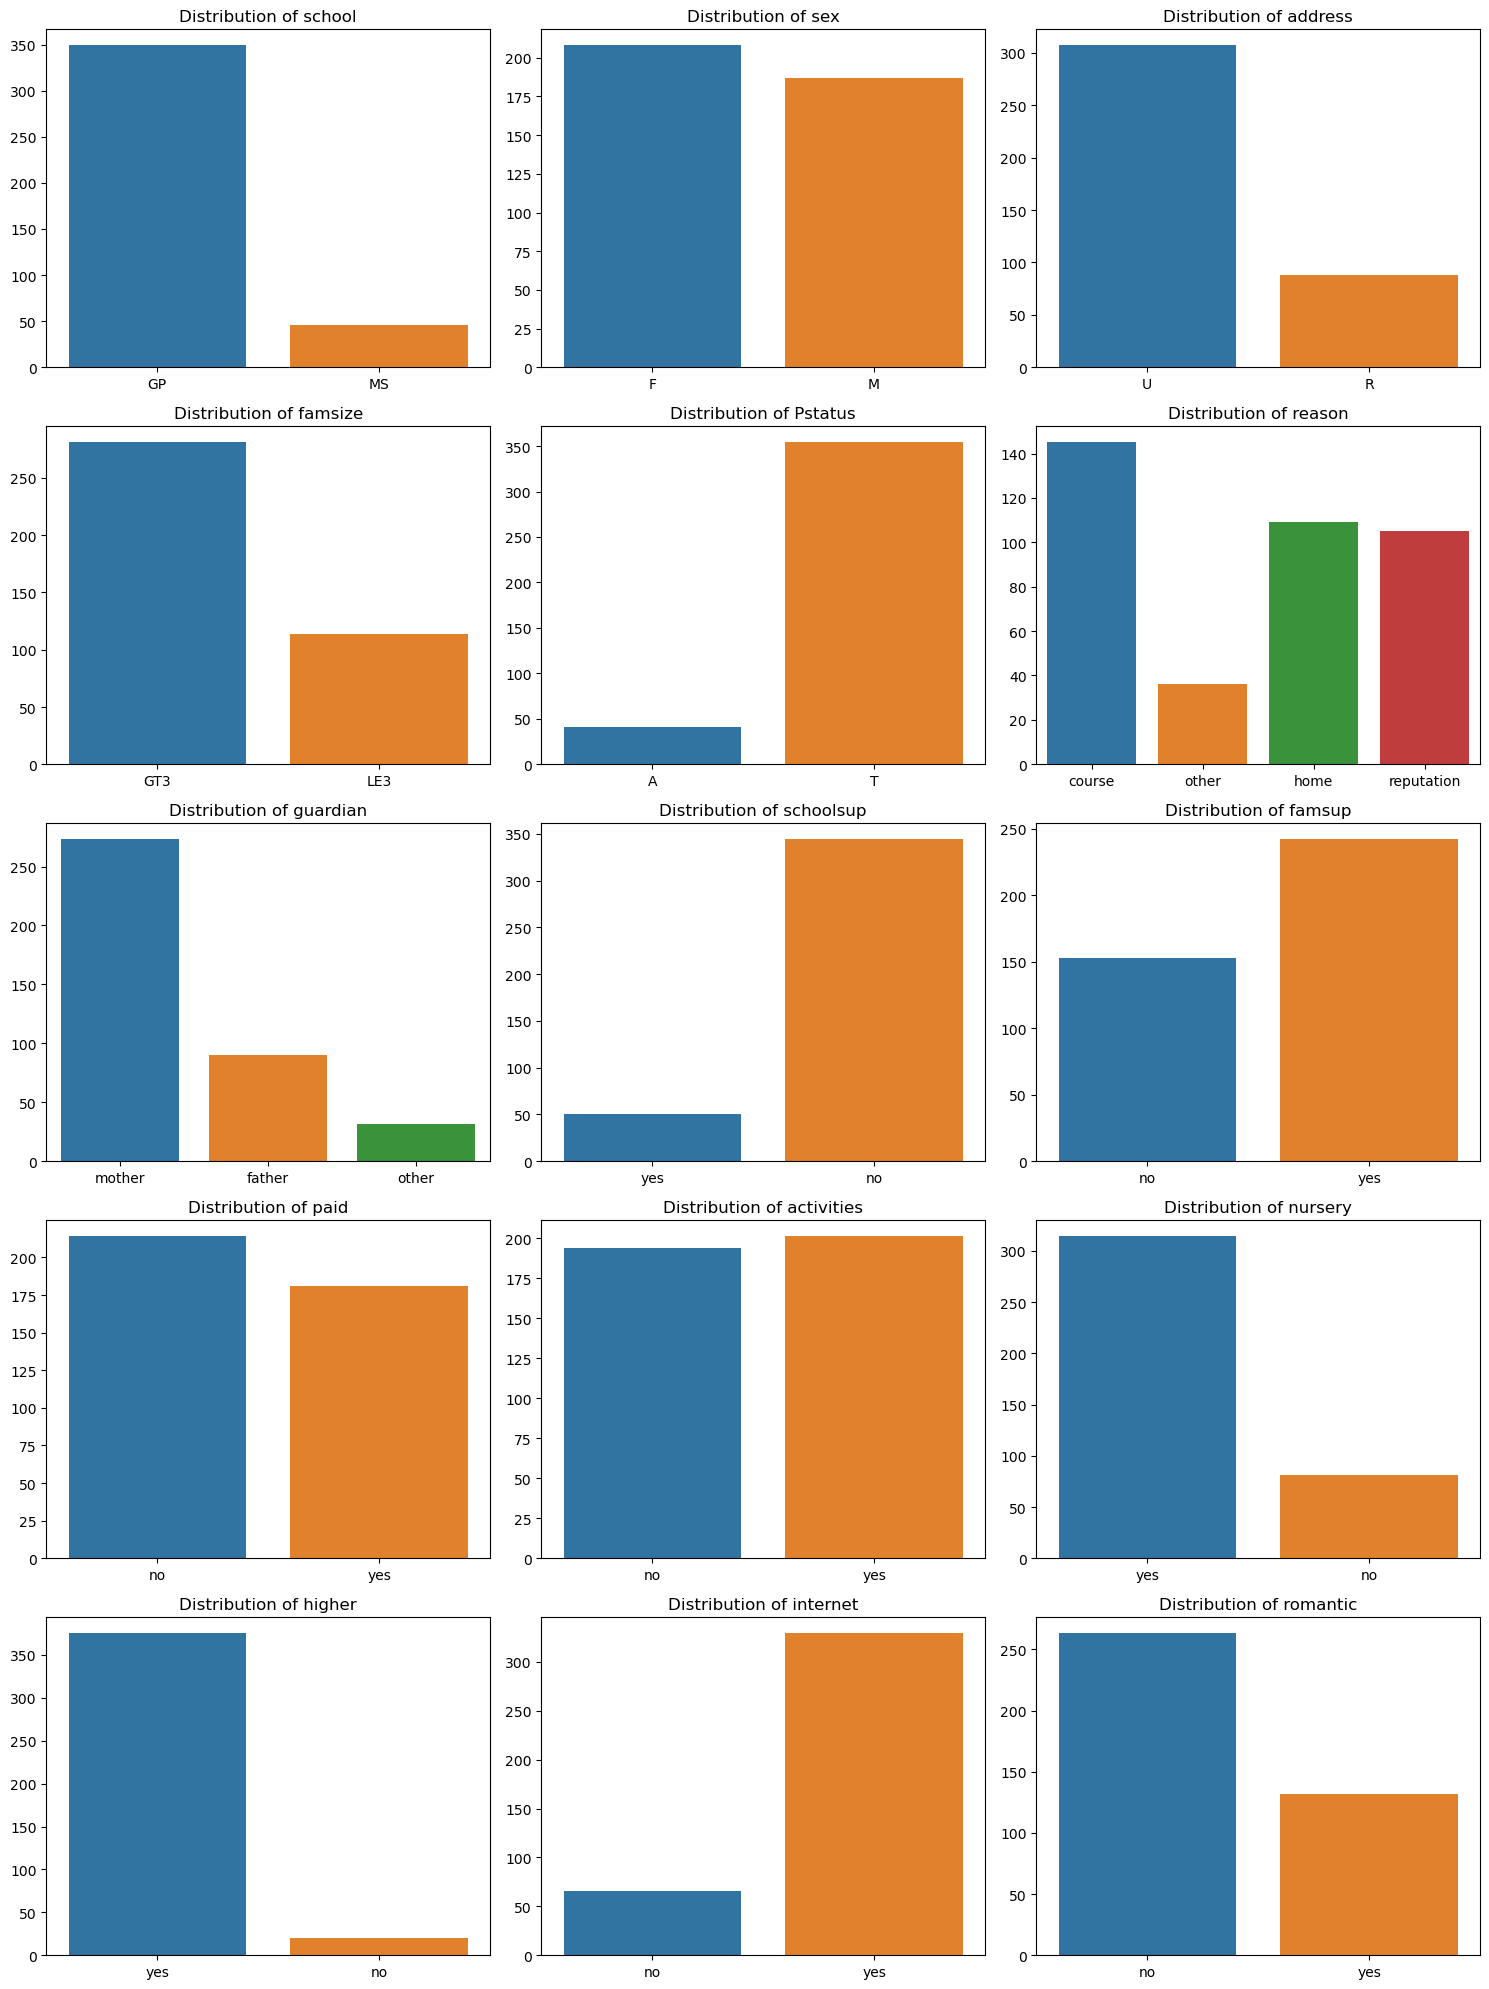

In [67]:
# Distribution of categorical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                        'activities', 'nursery', 'higher', 'internet', 'romantic']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=math, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

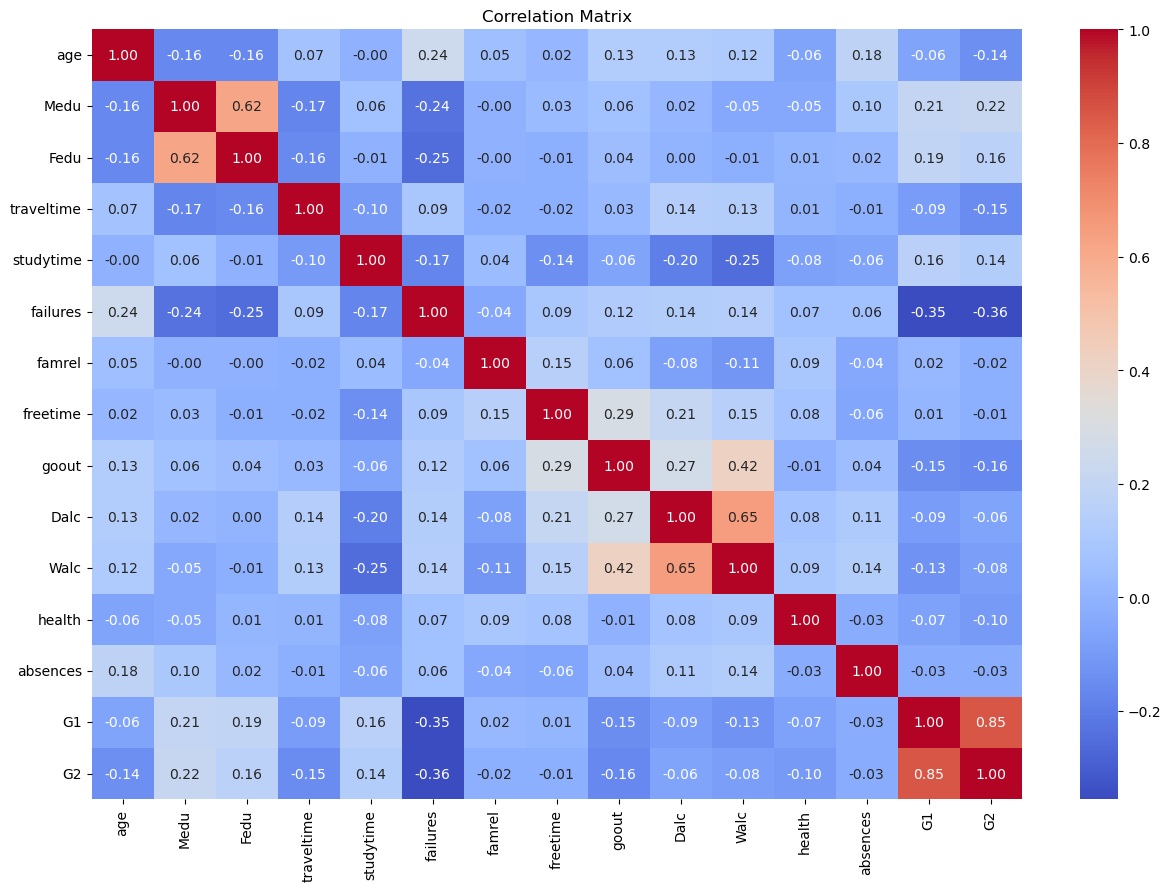

In [68]:
# Correlation matrix for numerical variables
corr_matrix = math[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

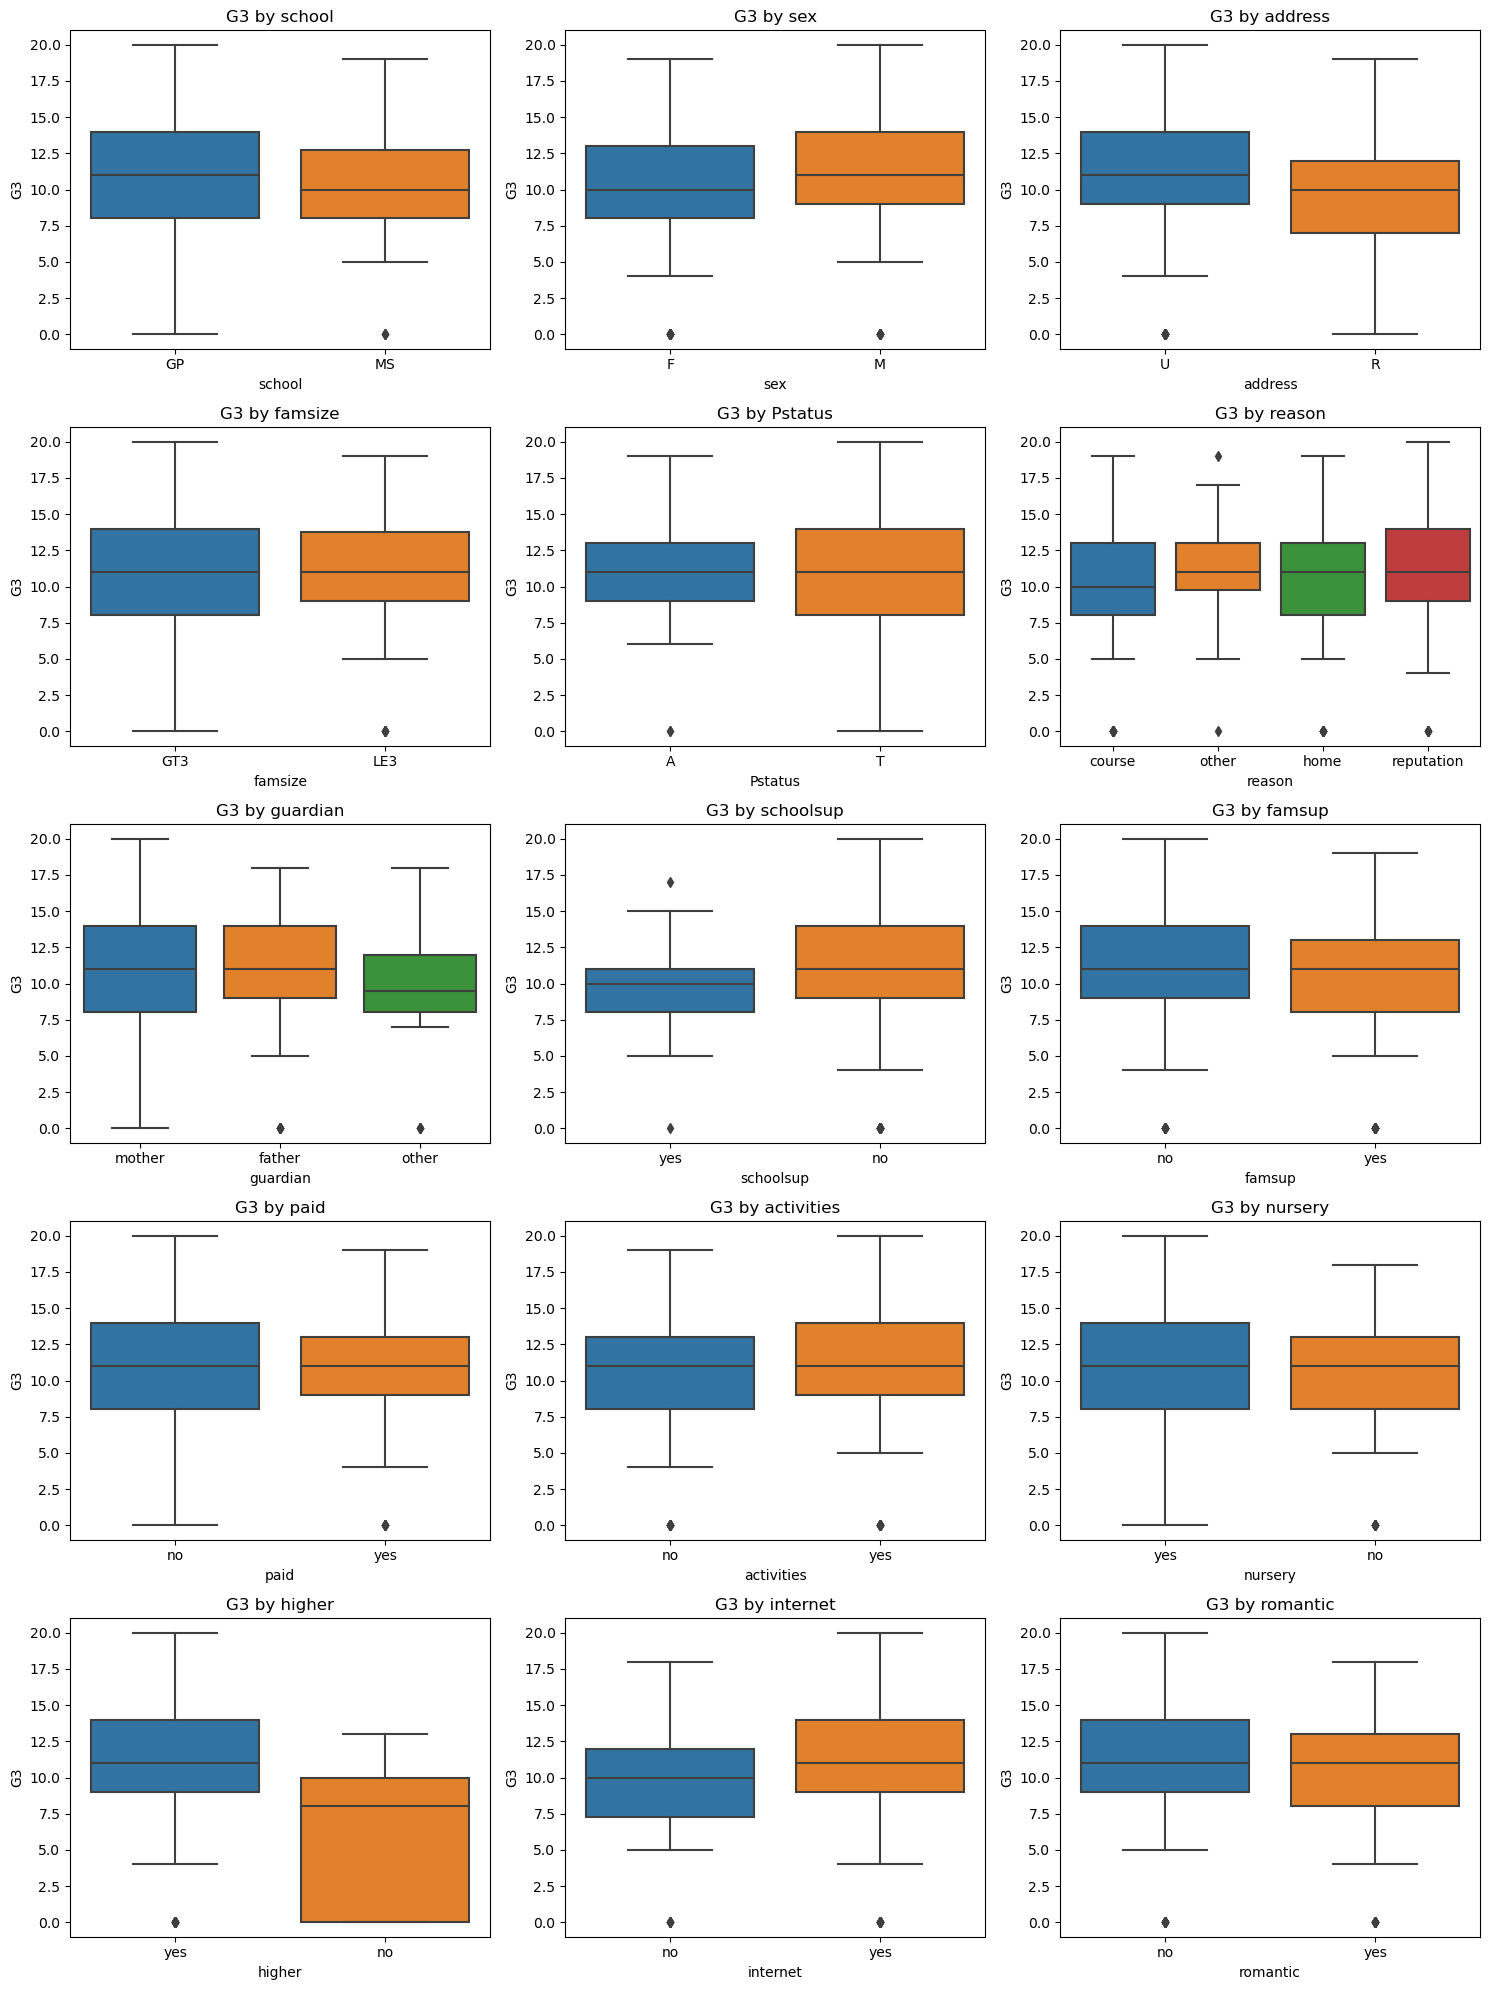

In [69]:
# Boxplot for final grade (G3) by categorical features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=math, x=feature, y='G3', ax=axes[i])
    axes[i].set_title(f'G3 by {feature}')

plt.tight_layout()
plt.show()

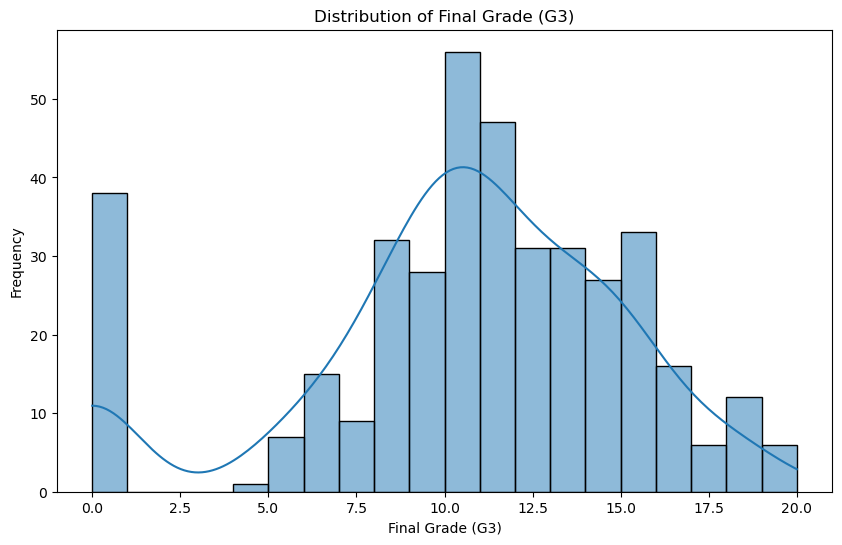

In [70]:
# Final Grades distribution
plt.figure(figsize=(10, 6))
sns.histplot(math['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

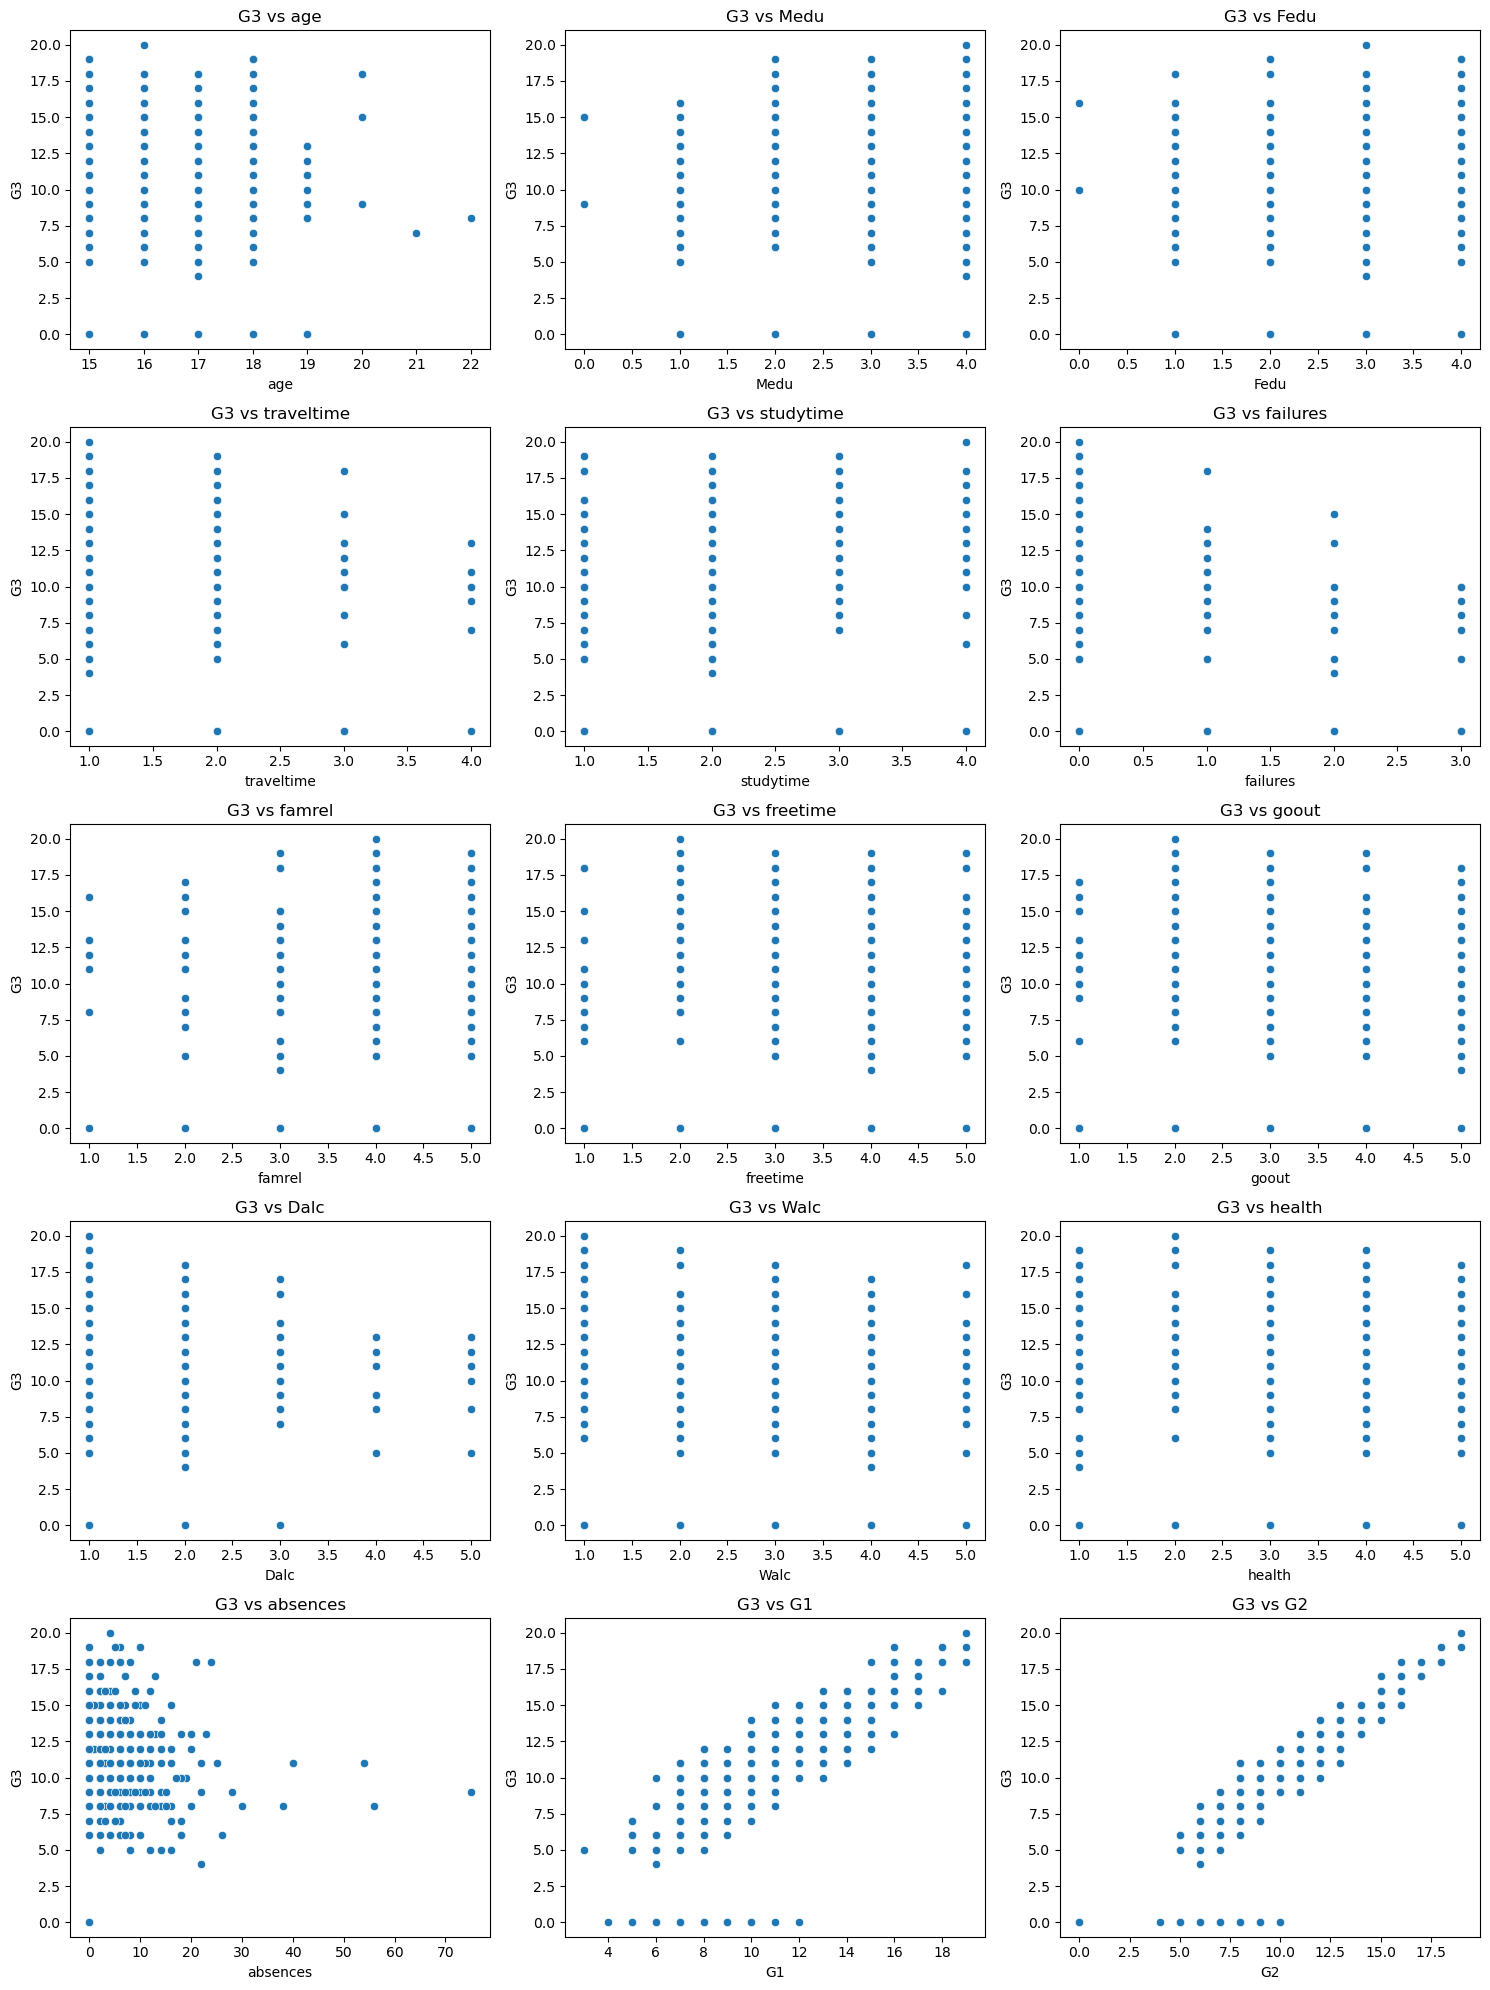

In [71]:
# Scatter plots to show relationships between G3 and other numerical variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=math, x=feature, y='G3', ax=axes[i])
    axes[i].set_title(f'G3 vs {feature}')
plt.tight_layout()
plt.show()

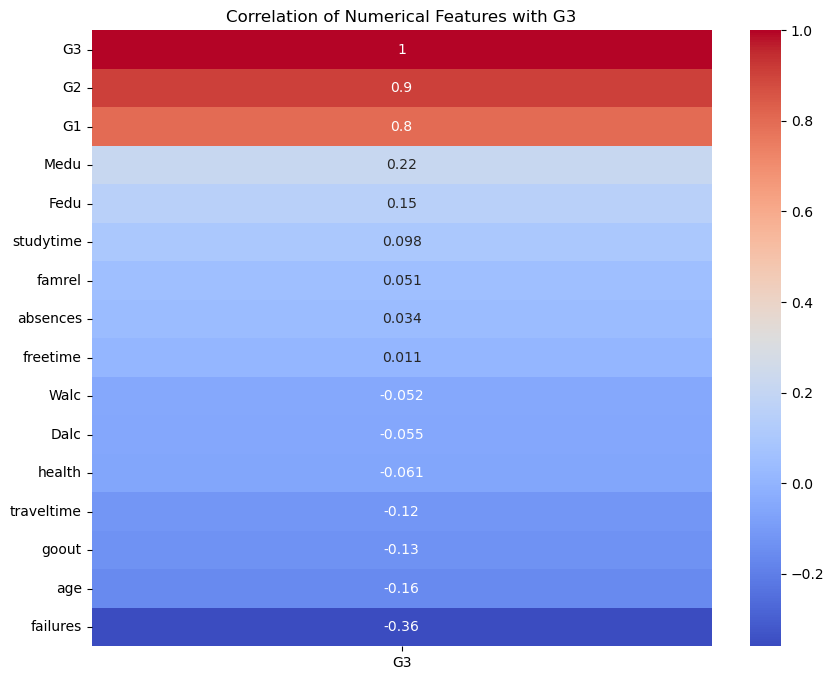

In [72]:
# Calculate correlation coefficients between G3 and other numerical features
full_numerical = numerical_features + ['G3']
plt.figure(figsize=(10, 8))
sns.heatmap(math[full_numerical].corr()[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with G3')
plt.show()